# Profitable App Profile

## Project's Goal

We'll take the role of a data analyst, who has to advise company specialized in developing apps for Android and iOS directed towards an english-speaking company. The company's business consists in in-app advertisement, so the revenue is highly influenced by the number of user an application has. The task is to find out which apps are the most profitable one's according to the companies profile.

## Datasets 

In this project, we'll use two datasets that can be easily found on kaggle.com and offer data on apps from Google Play Store and Apple Store.

Google Play Store = https://www.kaggle.com/lava18/google-play-store-apps

Apple Store = https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps


### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.style.use("seaborn-whitegrid")

### Preview of The Google Play Store Dataset

In [2]:
google = pd.read_csv(r"C:\Users\celio\My Projects\Guided Projects\Bewerbung\googleplaystore.csv")
google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### Preview Of The Apple Store Dataset

In [3]:
apple = pd.read_csv(r"C:\Users\celio\My Projects\AppleStore.csv", encoding = "utf8")
apple.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1


The Apple Store dataset give us about the same information that the Google Play data set does.

## Checking For Duplicates

The first thing we have to do is check for duplicates:

### Google Play Store

In [4]:
google[google.duplicated("App",keep =False)].sort_values(by="App")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


In the Google Play Store, we have almost 2000 repeated entries. 

We can also see, based in the table above, that the apps are perfect duplicates, so we can keep any of the results. However, for the sake of not wasting data, we'll keep the entry with the most reviews.

In [5]:
google = google.sort_values(by="Reviews", ascending = False).drop_duplicates("App",keep = "first")

We can confirm that the changes were made below:

In [6]:
google[google.duplicated("App")].sum()

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

### Apple Store

We can repeat the same procedure for the Apple Store.

In [7]:
apple[apple.duplicated("track_name", keep = False)]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


Above, there are two duplicates. Again, we'll keep the one with more reviews.

In [8]:
apple = apple.sort_values(by="rating_count_tot", ascending = False).drop_duplicates("track_name", keep = "first")

Confirming changes

In [9]:
apple[apple.duplicated()].sum()

id                  0.0
track_name          0.0
size_bytes          0.0
currency            0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
user_rating         0.0
user_rating_ver     0.0
ver                 0.0
cont_rating         0.0
prime_genre         0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
vpp_lic             0.0
dtype: float64

# Findings Apps for English Speakers

As mentioned above, the company produces apps for an english speaking community. Since Google Play Store contains apps from all over the world, we have to elimite these apps from the dataset to get a more accurate analysis.

#### Google Play Store

In [10]:
# Creating a function that identifies ansi-ii characters
def is_english(name):
    for i in name:
        if ord(i)>127: # if ord>127 means it's not ansii
            return False
    return True
            

google["is_english"] = google["App"].apply(is_english) # creates a new column on data set

google = google[google["is_english"]==True] # filters the DataFRrame by the new column
google.sort_index().head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_english
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,True
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,True


#### Apple Store

We can do the same for the Apple Store dataset.

In [11]:
apple["is_english"] = apple["track_name"].apply(is_english)
only_english = apple.loc[apple["is_english"]==True]
apple = only_english
apple.sort_index().head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,is_english
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,True
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1,True
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1,True
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1,True
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,True


In [12]:
print(google.shape, apple.shape)

(9118, 14) (5705, 17)


It's evident that some rows were deleted from the DataFrame, but now the available sample is more representative of the app's profile we're looking for.

## Checking For Missing Data

The next step is to find out if there is any missing data.

### Google Play Store

In [13]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9118 entries, 2989 to 4177
Data columns (total 14 columns):
App               9118 non-null object
Category          9118 non-null object
Rating            7752 non-null float64
Reviews           9118 non-null object
Size              9118 non-null object
Installs          9118 non-null object
Type              9117 non-null object
Price             9118 non-null object
Content Rating    9117 non-null object
Genres            9118 non-null object
Last Updated      9118 non-null object
Current Ver       9110 non-null object
Android Ver       9115 non-null object
is_english        9118 non-null bool
dtypes: bool(1), float64(1), object(12)
memory usage: 578.8+ KB


We can spot missing data in the following columns:

1) Rating

2) Content Rating

3) Current Version

4) Android Version

#### The Rating Column

It's the column with the most missing values. It's possible to take advantage of the fact that data is nummeric and try imputation.

We can verify some metrics, to see which one is more suitable to fill the missing data with. 

We'll use a histogram to verify how ratings are distributed across the dataset.

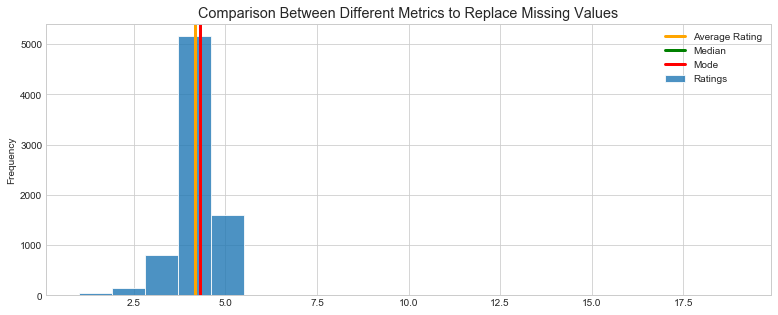

In [14]:
google["Rating"].plot.hist(bins = 20, figsize=(13,5), label = "Ratings", alpha = 0.8)
plt.axvline(google["Rating"].mean(), color = "orange", linewidth = 3, label = "Average Rating")
plt.axvline(google["Rating"].median(),color = "green", label ="Median", linewidth = 3)
plt.axvline(google["Rating"].mode().mean(),color = "red", label = "Mode", linewidth = 3)
plt.title("Comparison Between Different Metrics to Replace Missing Values", fontsize ="x-large")
plt.legend()
plt.show()

Immediately, we can see that something looks off. 

Ratings in the Google Play Store go from 0 to 5 Stars, but the plot indicates that there might be apps with more than 5 stars.

In [15]:
google[google["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_english
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,True


It looks like there is one app that's causing the metrics to deviate from what we expect. 

If we look closely, however, we can see that there was a problem filling the data in that row. The values seen to have been shifted to the left due to the missing data in that row (at the Android Version and the Content Rating). If we take a look at the **reviews, size and installs** columns, this becomes clear.

1) The Installs column contains data from the Type column

2) The Size column contain data which belongs to the Installs column

3) Finally the Reviews data has data from the Size column. 

Now we have to decide what to do with this data. Since we have to find the most popular categories in Google Play Store and this information is missing altogether from that row, it's better to exclude it from the analysis than trying to find out the category it belongs to. 

In [16]:
# Droping the row by its index number
google = google.drop(10472,axis = 0)

After the small detour for an extra data cleaning, we can redo the plot.

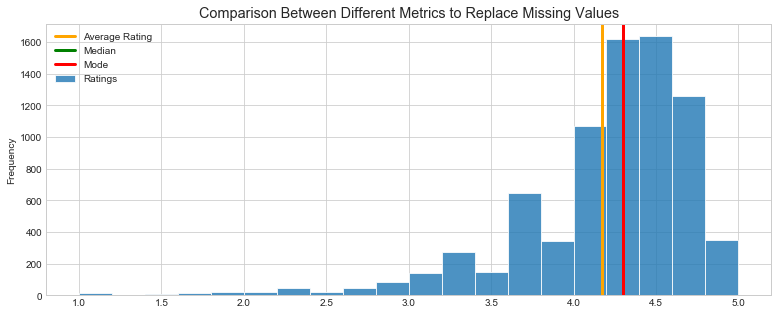

In [17]:
google["Rating"].plot.hist(bins = 20, figsize=(13,5), label = "Ratings", alpha = 0.8)
plt.axvline(google["Rating"].mean(), color = "orange", linewidth = 3, label = "Average Rating")
plt.axvline(google["Rating"].median(),color = "green", label ="Median", linewidth = 3)
plt.axvline(google["Rating"].mode().mean(),color = "red", label = "Mode", linewidth = 3)
plt.title("Comparison Between Different Metrics to Replace Missing Values", fontsize ="x-large")
plt.legend()
plt.show()

There are no major changes between the mean, mode and median values. However, we'll stick to the mean, because it's an unbiased stimator, which means that replacing values with the mean won't change the overall mean. 

#### Replacing Missing Values In The Rating Column

In [18]:
google.loc[google["Rating"].isnull(),"Rating"] = google["Rating"].mean()
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9117 entries, 2989 to 4177
Data columns (total 14 columns):
App               9117 non-null object
Category          9117 non-null object
Rating            9117 non-null float64
Reviews           9117 non-null object
Size              9117 non-null object
Installs          9117 non-null object
Type              9116 non-null object
Price             9117 non-null object
Content Rating    9117 non-null object
Genres            9117 non-null object
Last Updated      9117 non-null object
Current Ver       9109 non-null object
Android Ver       9115 non-null object
is_english        9117 non-null bool
dtypes: bool(1), float64(1), object(12)
memory usage: 578.7+ KB


The imputation was successful and now there is no more missing data in the rating column.

By deleting row 10742, which contained missing values, we also solve the problem with NaN values in the Content Rating value.

#### Other Missing Data

There is still missing data in the Current Version and in the Android Version column. However, these column aren't important for the ongoing analysis. For this reason and to keep this analysis short, we'll refrain from filling those columns.

### Apple Store

Now that we're done with the Google Play Store, we'll check for missing data in the Apple Store.

In [19]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5705 entries, 0 to 6584
Data columns (total 17 columns):
id                  5705 non-null int64
track_name          5705 non-null object
size_bytes          5705 non-null int64
currency            5705 non-null object
price               5705 non-null float64
rating_count_tot    5705 non-null int64
rating_count_ver    5705 non-null int64
user_rating         5705 non-null float64
user_rating_ver     5705 non-null float64
ver                 5705 non-null object
cont_rating         5705 non-null object
prime_genre         5705 non-null object
sup_devices.num     5705 non-null int64
ipadSc_urls.num     5705 non-null int64
lang.num            5705 non-null int64
vpp_lic             5705 non-null int64
is_english          5705 non-null bool
dtypes: bool(1), float64(3), int64(8), object(5)
memory usage: 651.8+ KB


There seems to be no missing data in the dataset.

## Deciding Which Parameter To Use

After this small data cleaning, we have to decide which parameter to use when looking for the most profitable apps. That's an important step before going through in-depth analysis.

#### The Google Play Store

Considering that the company's business consists in in-app advertisement and the success of this business model is highly influenced by the number of users an app has, it would be possible to assume that both the Reviews and the Installs columns could give some insight on the number of users which interact with the app.

On the one side, users who take the time to review an app usually interact more with them and could be more inclined to access advertisement that is offered in the application. Nevertheless, we have to consider that many users don't review the app, even though they use it.

On the other side, the number of installs is more approximate to number of users who have the application installed in their phones. The downside is that we don't know if users actually interact with the app and we can't assume what's the quality of this interaction.

So, for now, we'll stick with the number of installs. We'll assume that having a higher number of users (number of installations) is more profitable than the number of reviews(usually who use the app) when it comes to in-app advertisement.

#### The App Store

Unfortunately, there is no common metrics for the Installs column from the Google Play Store dataset in the Apple Store DataFrame. Nonetheless, we can use the total ratings to look for the most popular apps.


## App Categories With Most Users In The Google Play Store

Since we decided to proceed the analysis with the Installs column, further cleaning is necessary, since these numbers are in string type.

In [20]:
# Cleaning the Column
google["Installs"] = google["Installs"].str.strip("+").str.replace(",","").astype(float)

Now that the column in clean, we can verify how many installations apps have on average.

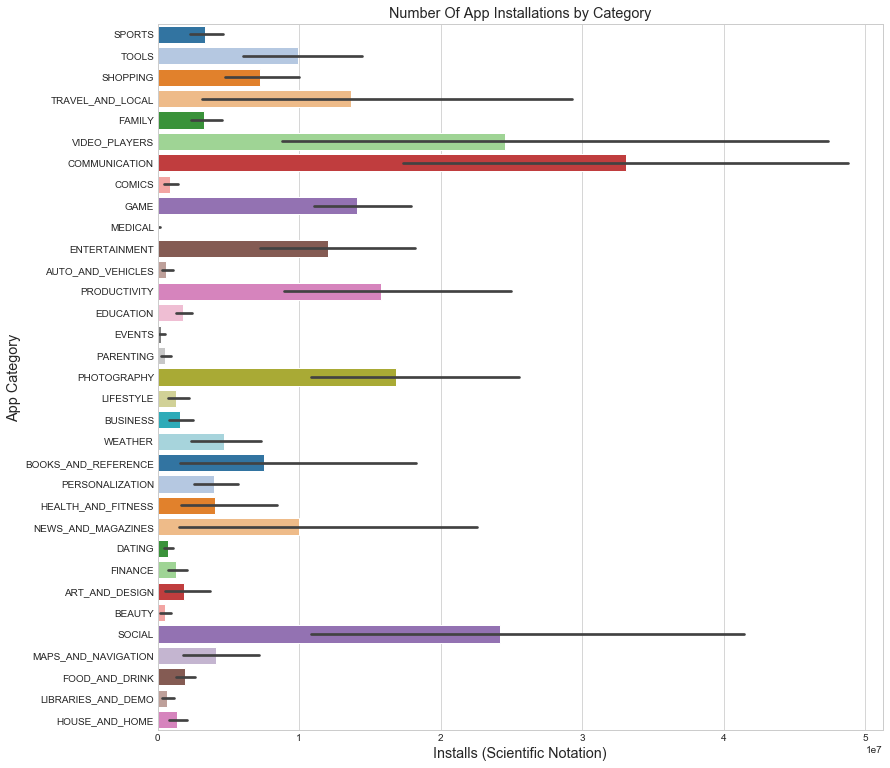

In [21]:
plt.figure(figsize=(13,13))
sns.barplot(data = google, y = "Category",x ="Installs", orient ="h", palette = "tab20")
plt.ylabel("App Category", fontsize="x-large")
plt.xlabel("Installs (Scientific Notation)", fontsize = "x-large")
plt.title("Number Of App Installations by Category", fontsize ="x-large")
plt.show()

According to the output above, the categories with the greatest of installations are:

1) Communication

2) Social

3) Video Players

4) Photography

5) Productivity

6) Games

However, we see that there is a great variation between the most downloaded and the least downloaded apps in these categories, as indicated by the black lines on top of each bar\*. We should examine them closer.

\* Technically speaking, the bars indicate where how many Installs the app with the highest stall number which isn't an outlier, that is, which is still representative of the sample, received.
    
Below, we get the most installed apps for each of these categories.


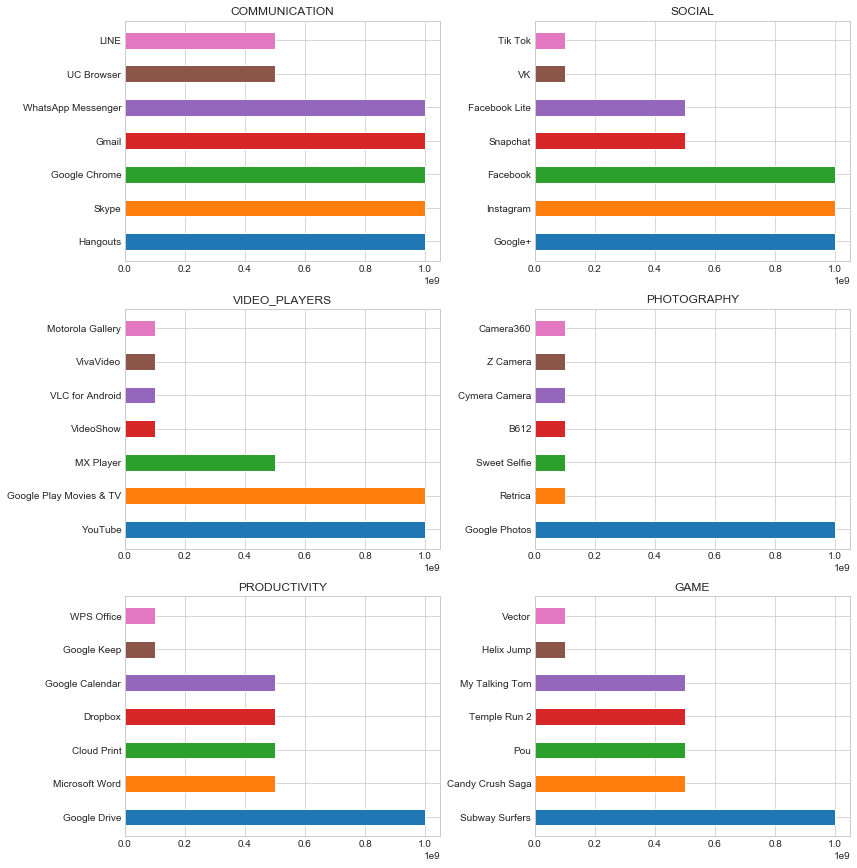

In [22]:
# Quick data cleaning of app names to avoid truncated view
test = google["App"].str.split("[-:]") # Using regex to split strings
def new_name(l): # gets only the first element of the app name
    if len(l)==1:
        return l[0]
    elif len(l)>1:
        return l[0]
test = test.apply(new_name).str.rstrip() 
google["App"] = test

categories = ["COMMUNICATION","SOCIAL","VIDEO_PLAYERS","PHOTOGRAPHY","PRODUCTIVITY","GAME"]
grid = plt.figure(figsize=(13,15))
for n in np.arange(0,6):
    data = google[google["Category"]==categories[n]].sort_values(by="Installs",ascending =False).head(7)
    data = data[["App","Category","Installs"]]
    ax = grid.add_subplot(3,2,n+1)
    ax.barh(y=data["App"],width=data["Installs"],height = 0.5,
           color = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink"])
    ax.set_title(categories[n])
    plt.subplots_adjust(wspace=0.3)

Based on the output above, we can see that some of these categories are heavily dominated by a few apps with a very widespread use:

1) **Communication** is dominated by **Gmail,Skype,Whatsapp and Google Chrome**.

2) **Social** has heavy contenders like **Google+, Instagram,Facebook and Snapchat**

3) **Video Players** has names like **YouTube and Google Play Movies & Tv**

All these names are well stablished names in the market, which means it's hard to compete with them. Most people will chose those well stablished apps over new ones, when deciding which application to download for their phones.

As for the **Photography** and **GAME** categories, the sitution is different.

1) **Photography** : while Google Photos has a very large number of downloads, based on common market knowledge, it has a different function than the other apps. While Google Photos offers a tool to store and organize pictures, other apps enable the user to modify pictures taken. For this reason, developing a Photography app could be a great idea. 

2) **Game**: Subway Surfers has indisputably more installs than any other apps. However, all these games have different features and different mechanics. Therefore, it's not possible to say that Subway Surfers excludes the other contenders from competition or dominates the market in any way. Considering this, a game is also a market worth investing in.

Last but not least, there is the **Productivity** category. This category is worth investigating further. While there are some heavy contenders, they don't seem to fulfill the same function. That puts this category in a grey zone, between the ones we've assessed so far.

#### The Productivity Category

In [23]:
prod = google[google["Category"]=="PRODUCTIVITY"]
prod["Installs"].describe(percentiles=[0.25,0.5,0.75,0.9])

count    3.590000e+02
mean     1.579450e+07
std      7.662621e+07
min      0.000000e+00
25%      5.000000e+02
50%      1.000000e+05
75%      1.000000e+06
90%      1.000000e+07
max      1.000000e+09
Name: Installs, dtype: float64

Above, we can see that 90% of the apps of the Installs category still have 10.000.000 (10 million) downloads or less. Let's see what sort of apps there are that are below the 90th percentile.

In [24]:
prod.loc[prod["Installs"]<=prod["Installs"].quantile(0.9),["App",
                                                          "Category",
                                                          "Installs"]].sort_values(by="Installs",
                                                                                   ascending =False).head(10)

,App,Category,Installs
3511,Easy Voice Recorder,PRODUCTIVITY,10000000.0
3513,CM FILE MANAGER HD,PRODUCTIVITY,10000000.0
3924,Fake Call,PRODUCTIVITY,10000000.0
3504,Todoist,PRODUCTIVITY,10000000.0
3500,Keeper,PRODUCTIVITY,10000000.0
3451,All,PRODUCTIVITY,10000000.0
3529,Polaris Office,PRODUCTIVITY,10000000.0
4079,Mobile Security & Antivirus,PRODUCTIVITY,10000000.0
3475,HTC Calendar,PRODUCTIVITY,10000000.0
3560,Jorte Calendar & Organizer,PRODUCTIVITY,10000000.0


As expected, the variety among productivity apps is huge. Even with few knowledge over the apps above, we can say that there are calenders, apps for taking notes, apps for managing files, antivirus and etc. This means that there is no clear dominance of the market.

For this reason, the productivity app is also a great idea of an application to be developed by the company. 

## Best App Category In The Apple Store

After indetifying trends for the Google Play Store, we can explore the Apple Store dataset.

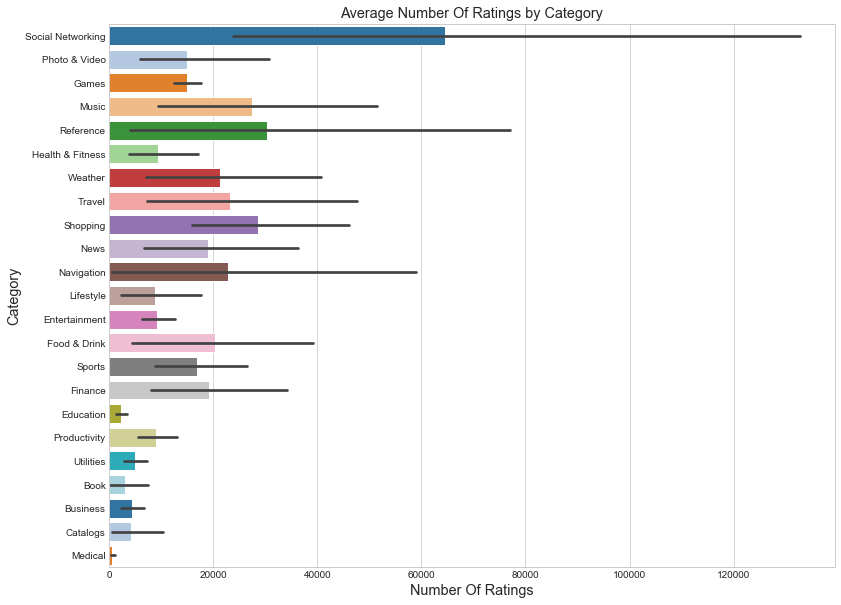

In [25]:
plt.figure(figsize=(13,10))
sns.barplot(data = apple,y="prime_genre",x="rating_count_tot", orient="h",
           palette="tab20")
plt.xlabel("Number Of Ratings", fontsize="x-large")
plt.ylabel("Category",fontsize="x-large")
plt.title("Average Number Of Ratings by Category", fontsize="x-large")
plt.show()

The graphic above indicates that the categories with most ratings (which indicates a higher number of users) are:

1) Social Networking

2) Reference

3) Shopping

4) Music

5) Travel

6) Navigation

Here we face the same problem present in the Google Play Store: there is a high variance between the apps with the highest rating count and the ones with lower rating counts. So it's advisable to verify which are the top apps in the most popular categories. 

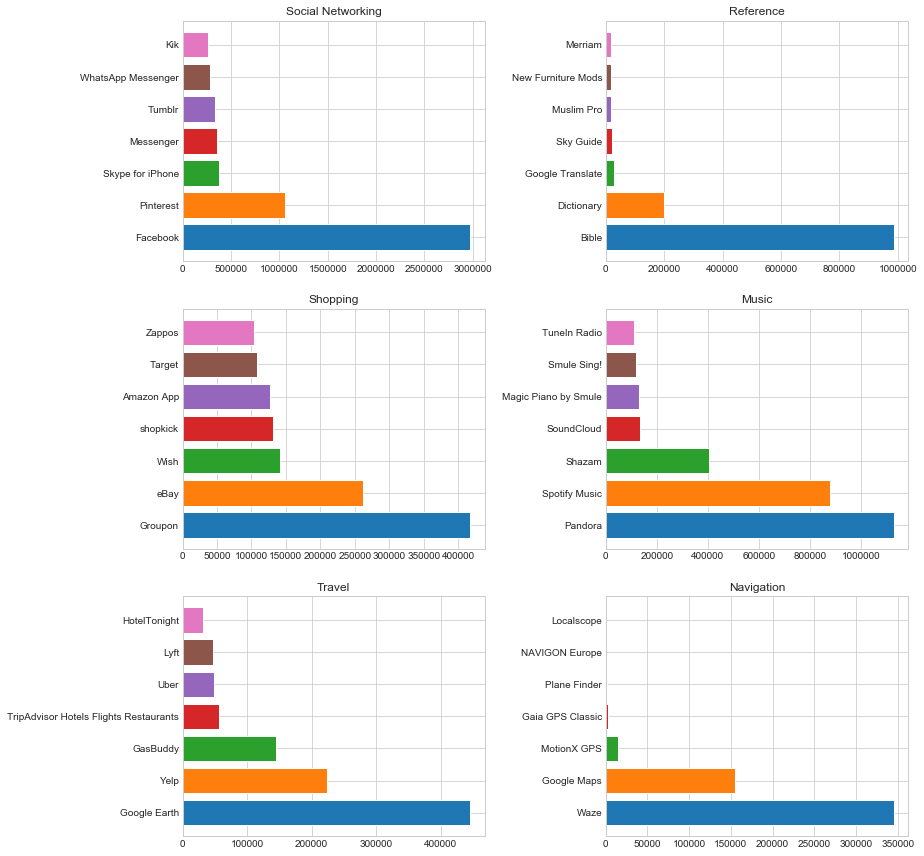

In [26]:
# Renaming Apps to avoid truncated view
apple = apple.drop(335,axis=0) # Drop a duplicate (same name, but two different versions (normal x Ipad))
rename = apple["track_name"].str.split("[&-./:]") # Again using a Regex
rename = rename.apply(new_name).str.rstrip()
rename = rename[rename != "Dictionary.com Dictionary & Thesaurus for iPad"]
apple["track_name"] = rename

categories = ["Social Networking","Reference","Shopping","Music","Travel","Navigation"] # wanted categories

apple_grid = plt.figure(figsize=(13,15))

for i in np.arange(0,6):
    data = apple[apple["prime_genre"]==categories[i]].sort_values(by="rating_count_tot",ascending = False).head(7)
    data = data[["track_name","prime_genre","rating_count_tot"]]
    ax = apple_grid.add_subplot(3,2,i+1)
    ax.barh(y=data["track_name"],width=data["rating_count_tot"],
           color = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink"])
    ax.set_title(categories[i])
    plt.subplots_adjust(wspace=0.4)

Based on the output above, we can make the following assessment. 

1) **Social Networking,Navigation,Shopping,Music and Travel** seem to be no go categories:
    
a) **Social Networking** has names like **Facebook,Skype, Whatsapp and etc**

b) **Navigation** features **Waze and Google Maps**
    
c) **Shopping** presents strong contenders, such as **Groupon,eBay,Wish and Amazon App**
    
d) **Music** count with names like **Spotify,Shazam,Pandora**
    
e) **Travel** is represented by **TripAdvisor,Yelp and Uber** - even though there is an interesting variety between the apps with the highest rating count for this category, each of these contender exerts a sort of market dominance in their respective sub-groups within the Travel genre. 
    
These apps are widely used by the public, so that competing with them is probably very hard. So it's better to avoid these categories

2) The **Reference** category seems very promising. The **Bible** is by far the most downloaded app. However, it has a different function than the other apps in the list, so that it does not have a market dominance.

# Conclusion

After analysing the data, we can say that the decision on what sort of app to produce lies in balance between the categories with the most users and the absence of market dominating apps. Since the in-app advertisement business model of the company relies heavily on the number of users, the app has to belong to a popular category. On the other hand, if the category presents a market dominating application, it's likely that users will choose the stablished app over the company's app.

Taking these two factors in consideration, we arrive at the following results:

### Google Play Store

The best categories to develop are: 

1) **Games**: there is no market dominance, in spite of some games having much more downloads than others. This means that any good games have an "chance" to become popular in the store.

2) **Photography:** The most popular app in this category is **Google Photos**, which is a heavy contender. Nevertheless, the other applications in this group have a different usage in than google photos, so that the market dominance is only apparent. 

3) **Productivity**: even though some widely known apps have a very high number of downloads compared to the others

Other popular categories like **Communication,Video players and Social** are already dominated by apps like **Facebook,Youtube,Instagram,Gmail** and so on.

### Apple Store

Most categories among the popular ones in Apple Store are already dominated by one or more apps, however one stands out:

1) **Reference**: this category includes apps like the Bible, Dictionaries and translators. Even though the Bible has much more downloads than any other, it does not influence the popularity of other apps of the same genre

### Final Words

The results above are powerful indicators of what category presents the greatest potential for an app. Nonetheless the success of an app relies in other factors like marketing and the features it contains. Unfortunately, the dataset does not offer enough depth to go into detail on these topics, but they could be interesting subjects of future analysis. 